In [2]:
import numpy as np
import pandas as pd

In [29]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
data = pd.read_csv('Twitter_Data.csv')
data = data.dropna()

In [7]:
data


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [15]:
# Preprocessing
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    words = word_tokenize(text.lower())      # Tokenization and lowercasing
    filtered_words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]  # Remove stopwords and stem
    return ' '.join(filtered_words)

data['clean_text'] = data['clean_text'].apply(preprocess_text)

In [16]:
data

,clean_text,category
0,modi promis minimum govern maximum govern expe...,-1.0
1,talk nonsens continu drama vote modi,0.0
2,say vote modi welcom bjp told rahul main campa...,1.0
3,ask support prefix chowkidar name modi great s...,1.0
4,answer among power world leader today trump pu...,1.0
...,...,...
162975,crore paid neerav modi recov congress leader h...,-1.0
162976,dear rss terrorist payal gawar modi kill plu m...,-1.0
162977,cover interact forum left,0.0
162978,big project came india modi dream project happ...,0.0


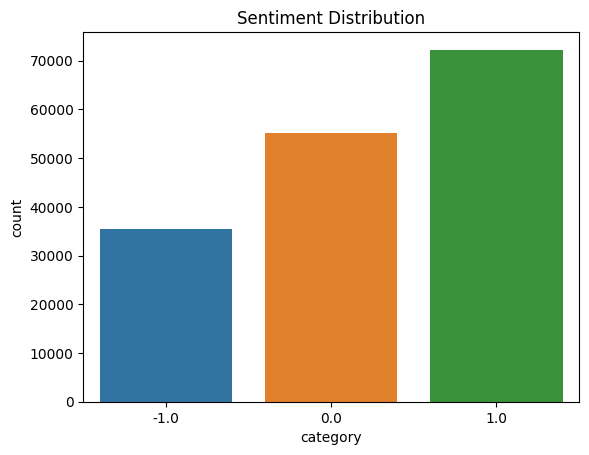

In [17]:
# Exploratory Data Analysis (EDA)
sns.countplot(x='category', data=data)
plt.title('Sentiment Distribution')
plt.show()

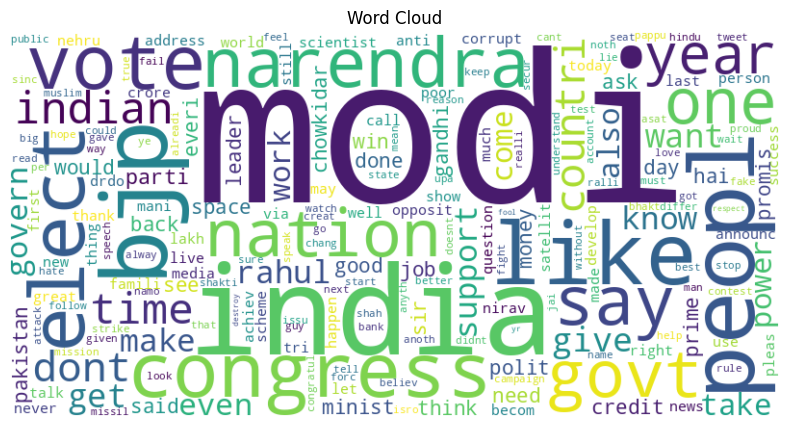

In [19]:
from wordcloud import WordCloud
from collections import Counter

# Tokenize and preprocess the entire dataset
all_tokens = ' '.join(data['clean_text']).split()
token_counter = Counter(all_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(token_counter)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

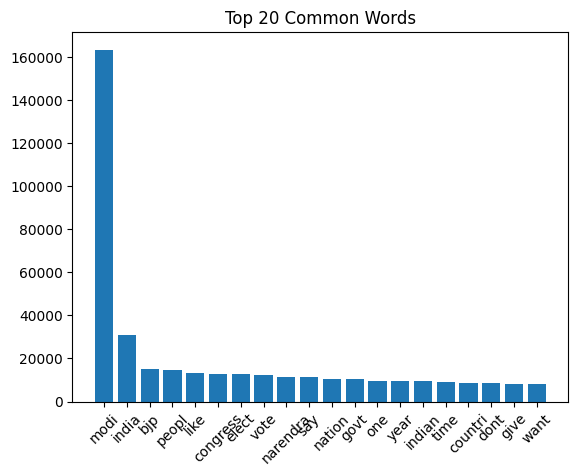

In [20]:
# Plot top N words
top_n = 20
common_words = [word[0] for word in token_counter.most_common(top_n)]
word_counts = [token_counter[word] for word in common_words]
plt.bar(common_words, word_counts)
plt.xticks(rotation=45)
plt.title(f'Top {top_n} Common Words')
plt.show()

In [21]:
# Train-test split
X = data['clean_text']
y = data['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Experiment with different text vectorization methods and n-grams
vectorizers = {
    'CountVectorizer': CountVectorizer(ngram_range=(1, 2)),
    'TfidfVectorizer': TfidfVectorizer(ngram_range=(1, 2))
}

Using CountVectorizer
Accuracy: 0.630208013744861

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.80      0.37      0.51      7152
         0.0       0.85      0.39      0.53     11067
         1.0       0.56      0.95      0.71     14375

    accuracy                           0.63     32594
   macro avg       0.74      0.57      0.58     32594
weighted avg       0.71      0.63      0.60     32594

--------------------------------------------------


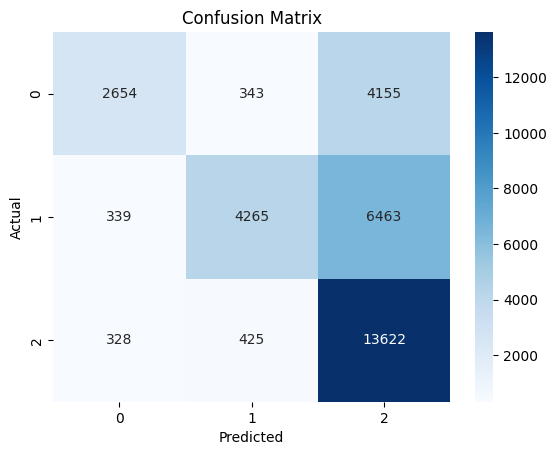

Using TfidfVectorizer
Accuracy: 0.5336565011965393

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.94      0.06      0.12      7152
         0.0       0.89      0.25      0.39     11067
         1.0       0.49      0.99      0.65     14375

    accuracy                           0.53     32594
   macro avg       0.77      0.43      0.39     32594
weighted avg       0.72      0.53      0.45     32594

--------------------------------------------------


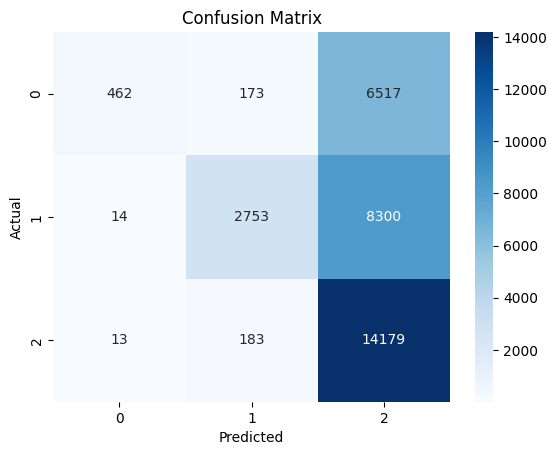

In [34]:
for vectorizer_name, vectorizer in vectorizers.items():
    print(f"Using {vectorizer_name}")
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Train Naive Bayes classifier
    model = MultinomialNB()
    model.fit(X_train_vectorized, y_train)

    # Predictions
    y_pred = model.predict(X_test_vectorized)

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()